In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('D:/Python_e/ds_salary_proj/salary_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,average salary,company_name,job_state,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research\n,NM,0,47,1,1,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System\n,MD,0,36,1,1,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4\n,FL,1,10,1,1,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL\n,WA,1,55,1,1,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions\n,NY,1,22,1,1,0,0,1


In [17]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_salary', 'max_salary',
       'average salary', 'company_name', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn'],
      dtype='object')

In [18]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		



 





#remove new line from job title

In [19]:
## Job title and seniority 
		
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [20]:
df['seniority'] = df['Job Title'].apply(seniority)
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [21]:
##  Fix state Los Angeles 
df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [22]:
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [23]:
##  Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [24]:
##  Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [25]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [26]:
df.coulmns

AttributeError: 'DataFrame' object has no attribute 'coulmns'

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_salary', 'max_salary',
       'average salary', 'company_name', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [32]:
## hourly wage to annual 
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.Hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.Hourly ==1 else x.max_salary, axis =1)

In [33]:
df[df.Hourly ==1][['Hourly','min_salary','max_salary']]

,Hourly,min_salary,max_salary
165,1,68,48
177,1,84,68
197,1,72,50
202,1,84,68
210,1,60,50
246,1,68,48
271,1,84,68
337,1,72,50
345,1,96,78
357,1,84,68


In [34]:
df['min_salary'] = df.apply(lambda x: x.min_salary/2 if x.Hourly ==1 else x.min_salary, axis =1)

In [37]:
df[df.Hourly ==1][['Hourly','min_salary','max_salary']]

,Hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [36]:
df['min_salary'] = df['min_salary'].apply(lambda x: int(x))

In [40]:
df.company_name

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_name, Length: 742, dtype: object

In [41]:
df['company_name']=df['company_name'].apply(lambda x: x[:-2])

In [42]:
df['company_name']

0                          Tecolote Researc
1      University of Maryland Medical Syste
2                                    KnowBe
3                                       PNN
4                         Affinity Solution
                       ...                 
737                                      GS
738                               Eventbrit
739           Software Engineering Institut
740                             Numeric, LL
741             Riverside Research Institut
Name: company_name, Length: 742, dtype: object

In [43]:
df.describe()

,Rating,Founded,Hourly,Employer Provided,min_salary,max_salary,average salary,same_state,age,python_yn,R_yn,spark_yn,aws_yn,excel_yn,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,1.0,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.0,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,1.0,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,1.0,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,1.0,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,1.0,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.0,1.000000,1.000000,1.000000,10051.000000,4.000000


In [44]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min_salary', 'max_salary',
       'average salary', 'company_name', 'job_state', 'same_state', 'age',
       'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'job_simp',
       'seniority', 'desc_len', 'num_comp'],
      dtype='object')

<Axes: >

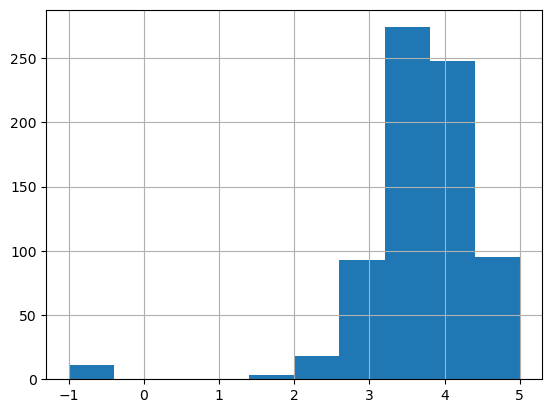

In [45]:
df.Rating.hist()

<Axes: >

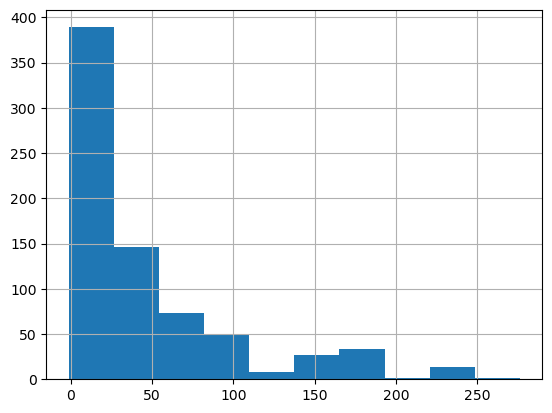

In [46]:
df.age.hist()

<Axes: >

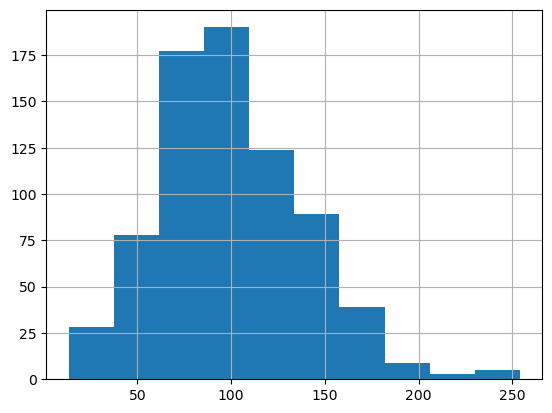

In [50]:
df['average salary'].hist()

<Axes: >

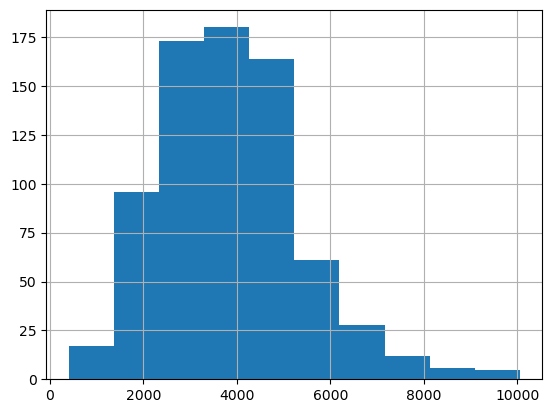

In [51]:
df.desc_len.hist()

In [54]:
df[['Rating','age','average salary','desc_len']].corr()

,Rating,age,average salary,desc_len
Rating,1.000000,0.021655,0.013492,-0.012281
age,0.021655,1.000000,0.019655,0.163911
average salary,0.013492,0.019655,1.000000,0.078808
desc_len,-0.012281,0.163911,0.078808,1.000000


<Axes: >

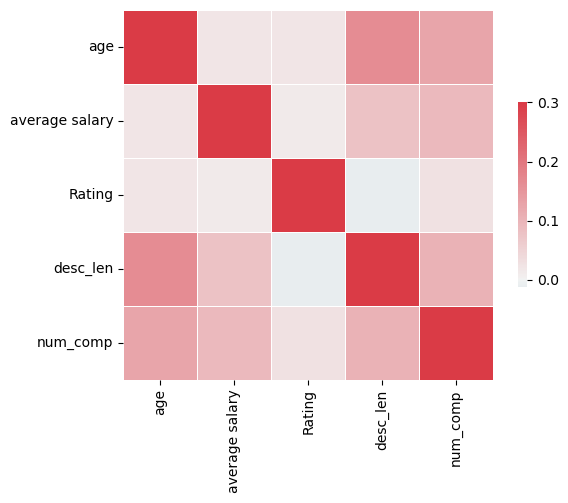

In [55]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','average salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [57]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_name', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority']]

graph for Location: total = 200


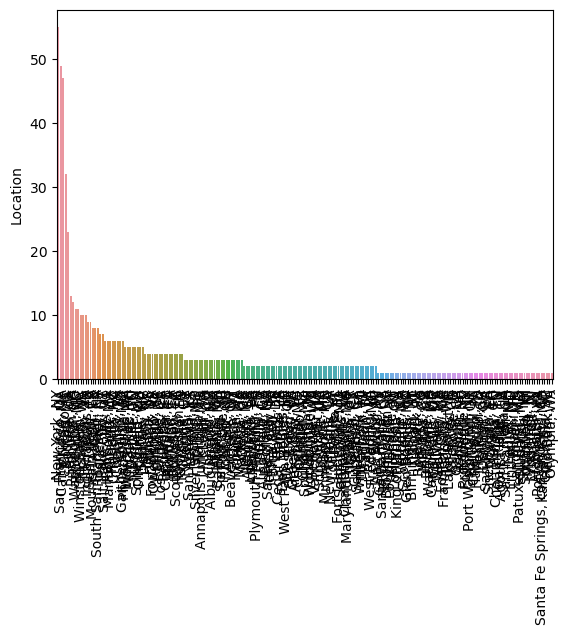

graph for Headquarters: total = 198


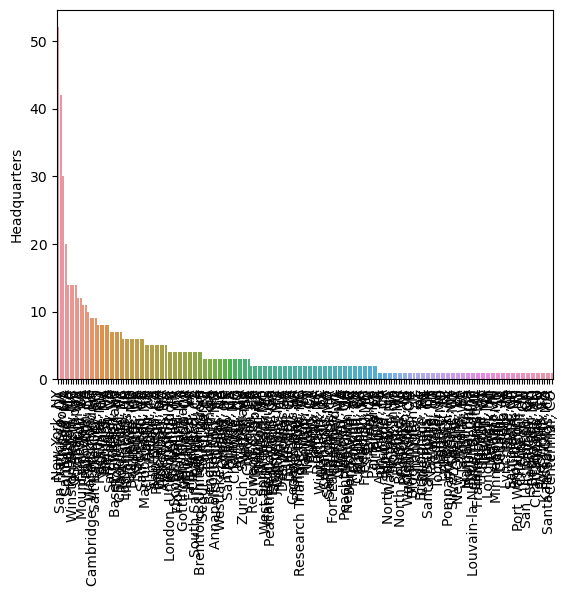

graph for Size: total = 9


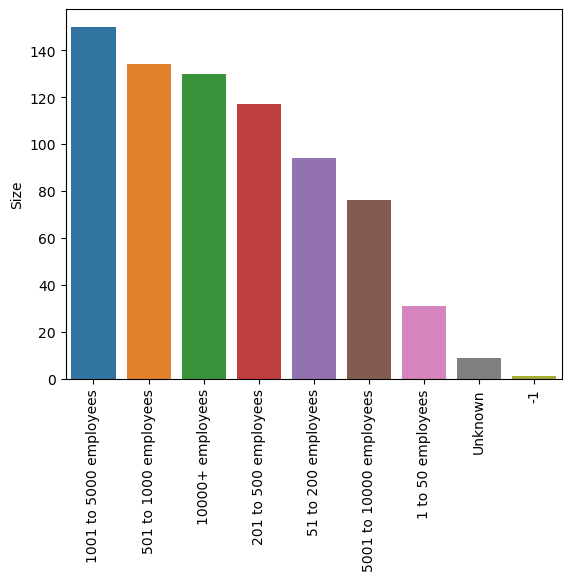

graph for Type of ownership: total = 11


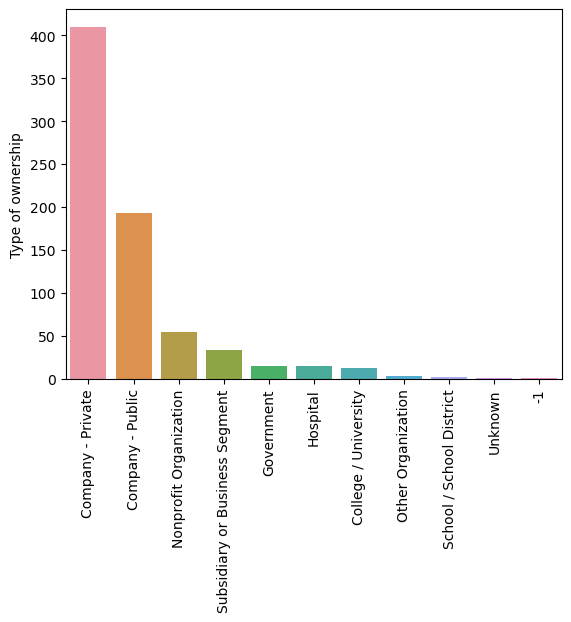

graph for Industry: total = 60


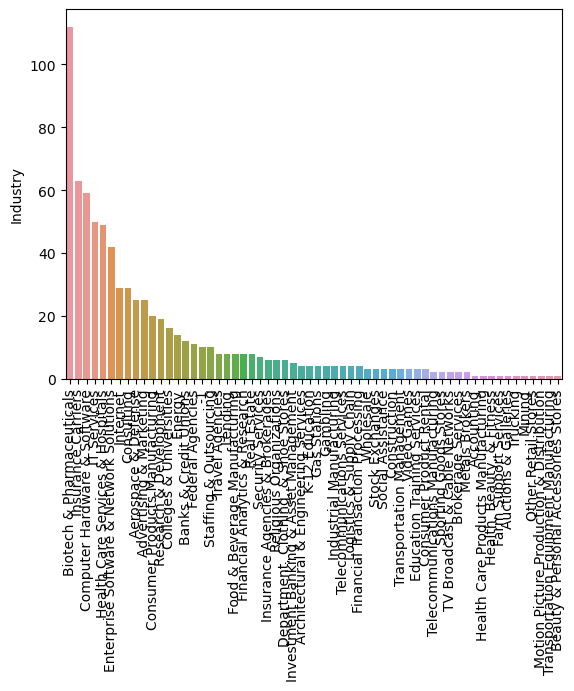

graph for Sector: total = 25


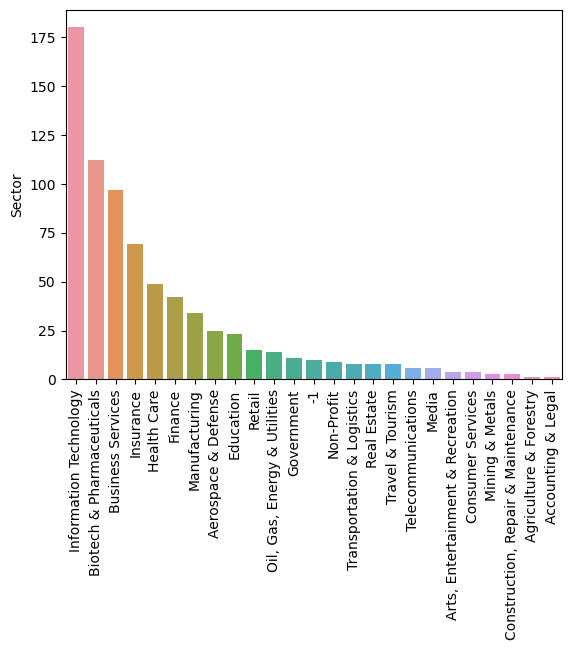

graph for Revenue: total = 14


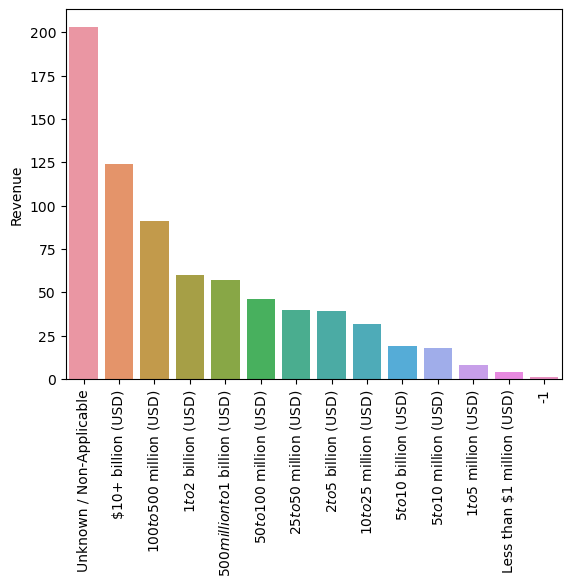

graph for company_name: total = 343


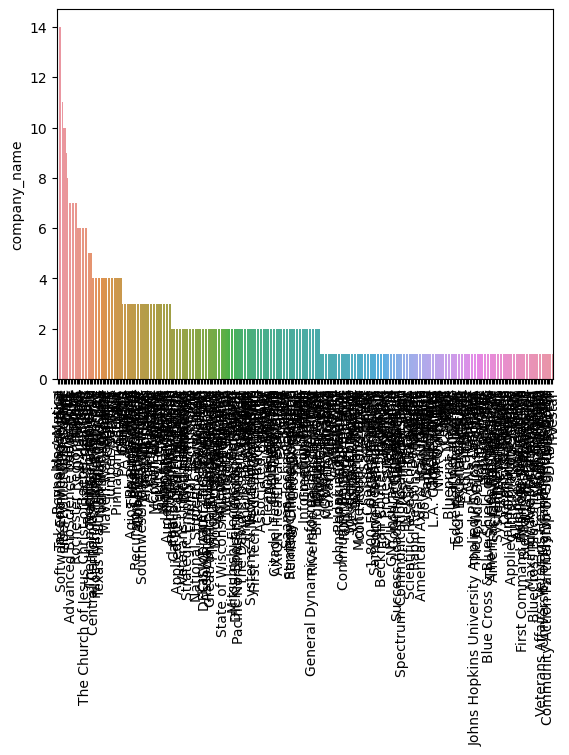

graph for job_state: total = 37


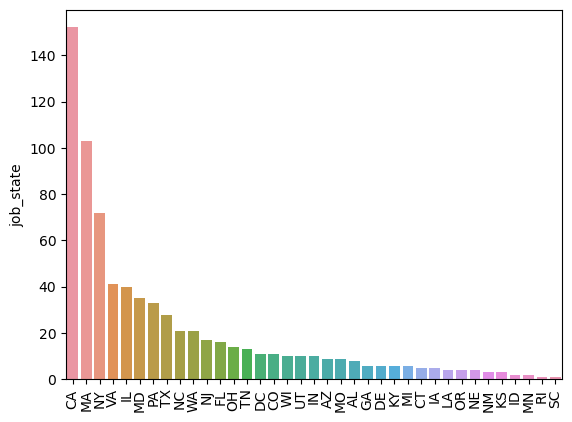

graph for same_state: total = 2


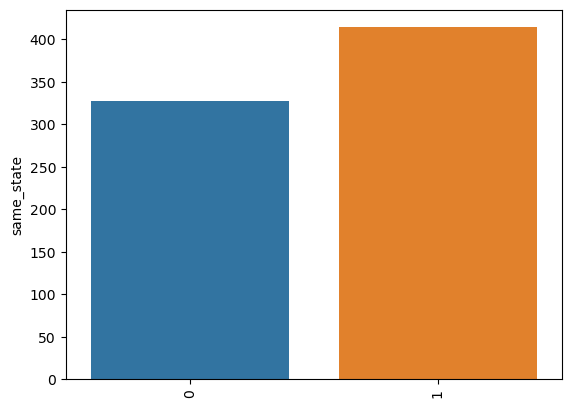

graph for python_yn: total = 2


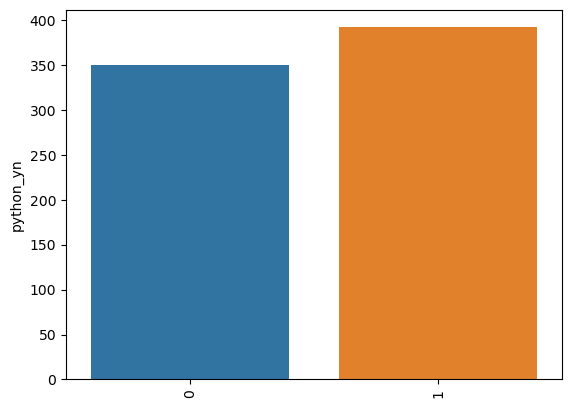

graph for R_yn: total = 1


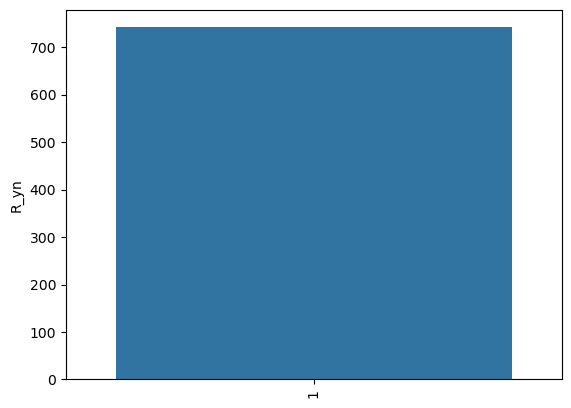

graph for spark_yn: total = 2


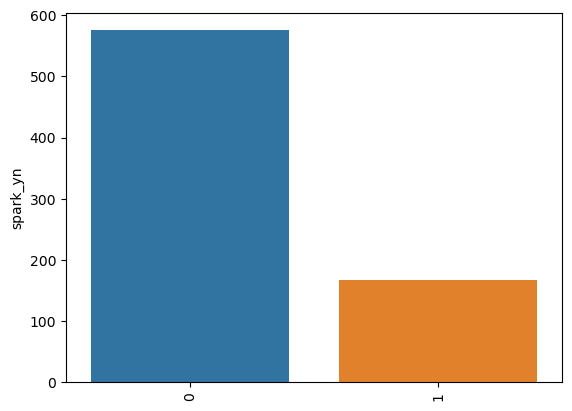

graph for aws_yn: total = 2


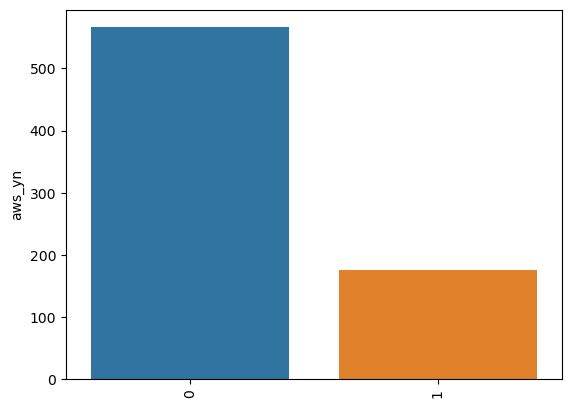

graph for excel_yn: total = 2


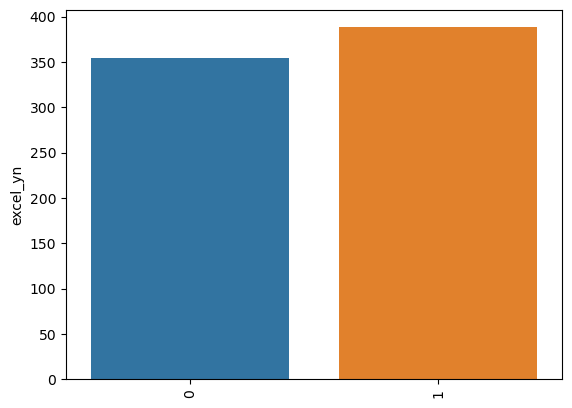

graph for job_simp: total = 7


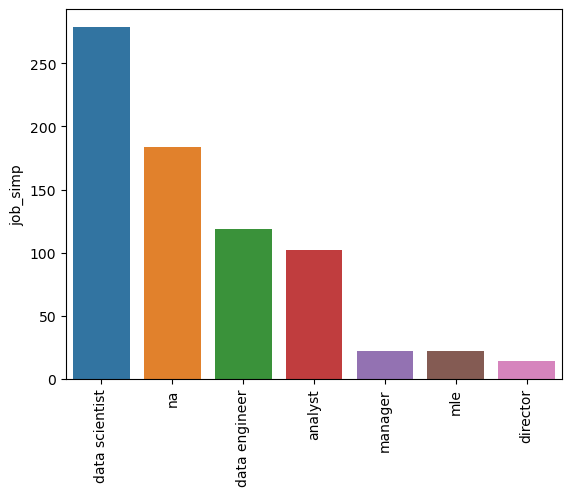

graph for seniority: total = 3


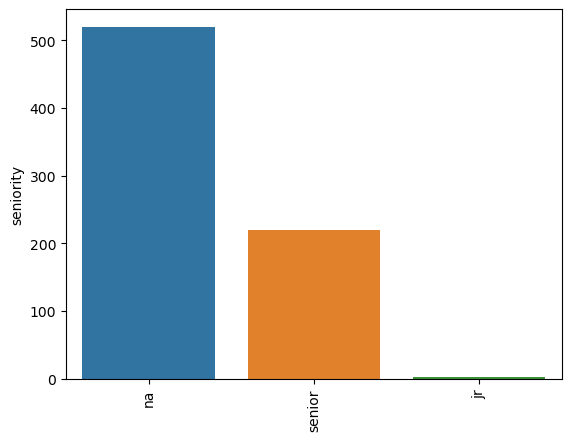

In [58]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


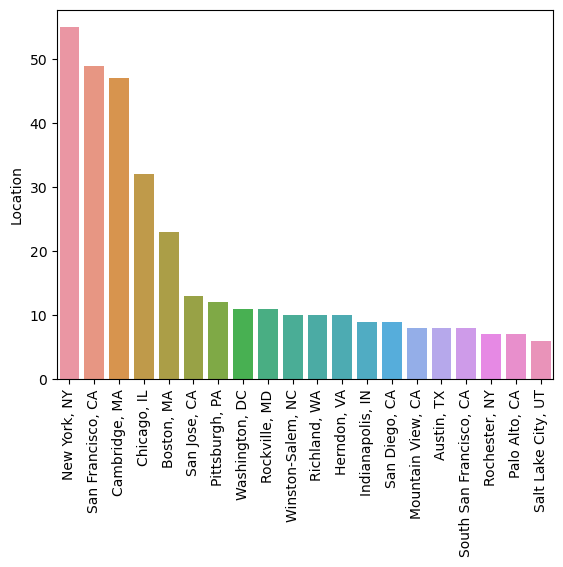

graph for Headquarters: total = 20


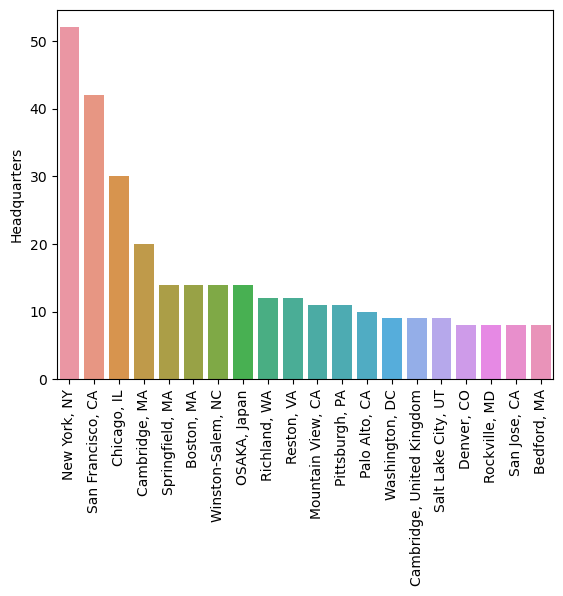

graph for company_name: total = 20


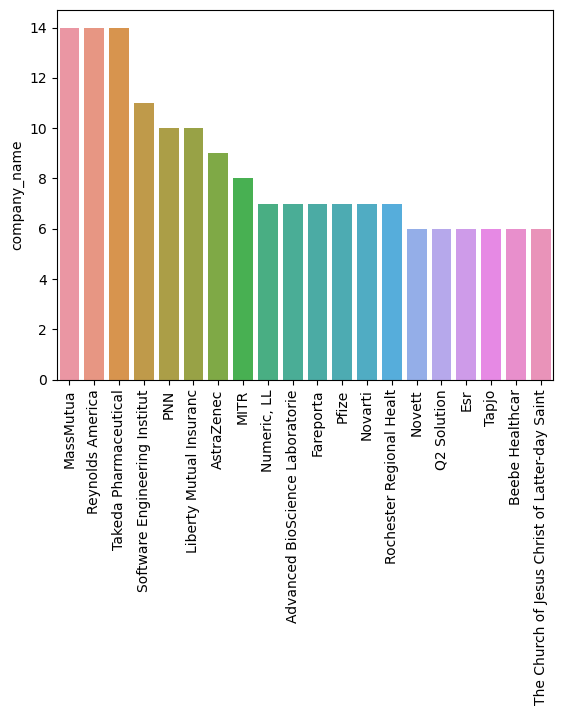

In [59]:
for i in df_cat[['Location','Headquarters','company_name']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [61]:
pd.pivot_table(df, index = 'job_simp', values = 'average salary')

,average salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [62]:
pd.pivot_table(df, index = ['job_simp', 'seniority'], values = 'average salary')

average salary
job_simp       seniority                
analyst        jr              56.500000
               na              61.155405
               senior          79.092593
data engineer  na              96.701220
               senior         124.689189
data scientist jr             106.500000
               na             107.043011
               senior         138.956522
director       na             168.607143
manager        na              84.022727
mle            na             119.133333
               senior         142.071429
na             na              73.988189
               senior         109.061404

In [64]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'average salary').sort_values('job_state', ascending = False)

average salary
job_state job_simp                      
WI        na                   54.000000
          data scientist      113.500000
          analyst              58.833333
WA        na                   97.500000
          data scientist       99.764706
...                                  ...
AZ        analyst              55.000000
          na                  124.500000
AL        na                   43.750000
          data engineer        65.000000
          analyst              62.200000

[114 rows x 1 columns]

In [65]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [69]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'average salary', aggfunc = 'count').sort_values('job_state', ascending = False)

average salary
job_state job_simp                      
WI        na                           4
          data scientist               3
          analyst                      3
WA        na                           1
          data scientist              17
          analyst                      3
VA        na                           5
          mle                          2
          data scientist              18
          data engineer               10
          analyst                      6
UT        data engineer                3
          analyst                      4
          data scientist               3
TX        na                           7
          data scientist              13
          data engineer                8
TN        data scientist               1
          data engineer               10
          analyst                      2
SC        na                           1
RI        analyst                      1
PA        manager                      3
          data engineer                1
          data scientist               6
          analyst                      8
          mle                          7
          na                           8
OR        data scientist               3
          data engineer                1
OH        na                           3
          data scientist               7
          analyst                      4
NY        na                          12
          mle                          2
          data scientist              40
          data engineer                4
          analyst                     14
NM        data scientist               3
NJ        data scientist               4
          analyst                      6
          data engineer                2
          manager                      2
          director                     2
          na                           1
NE        na                           4
NC        na                          12
          data scientist               3
          data engineer                6
MO        na                           3
          manager                      1
          data scientist               3
          analyst                      2
MN        data engineer                1
          analyst                      1
MI        manager                      2
          data scientist               4
MD        na                          16
          data scientist              13
          data engineer                3
          analyst                      3
MA        na                          46
          manager                      5
          director                     6
          data scientist              30
          data engineer               12
          analyst                      4
LA        analyst                      1
          data engineer                2
          na                           1
KY        na                           4
          data scientist               2
KS        mle                          3
IN        na                           4
          data scientist               2
          data engineer                4
IL        analyst                      3
          na                           6
          mle                          2
          director                     6
          data scientist              15
          data engineer                8
ID        analyst                      2
IA        analyst                      2
          data engineer                3
GA        data scientist               3
          na                           3
FL        data scientist               7
          data engineer                3
          analyst                      6
DE        na                           6
DC        data scientist               5
          data engineer                4
          analyst                      2
CT        na                           3
          data scientist               2
CO      

In [67]:
df['average salary']

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
5       95.0
6       73.5
7      114.0
8       61.0
9      140.0
10     163.5
11      85.0
12     139.0
13      65.5
14     113.5
15     146.0
16     102.0
17     153.5
18     142.5
19      87.5
20     105.5
21      96.0
22     112.5
23      84.0
24     143.0
25      86.5
26      99.5
27      47.5
28      84.0
29      85.0
30      76.5
31      96.0
32     114.5
33     121.0
34     112.5
35     106.0
36     107.0
37     110.0
38     147.5
39     106.0
40      88.0
41      98.5
42     142.5
43      82.5
44     130.0
45     155.0
46     184.5
47      29.5
48      86.5
49      81.0
50      91.0
51     114.5
52      68.0
53     115.0
54     109.5
55      75.5
56     154.5
57     143.5
58      73.5
59      95.0
60     107.0
61     115.0
62     139.5
63      67.0
64      85.0
65     118.0
66      79.5
67      56.5
68     128.5
69      97.5
70      66.5
71     179.5
72      76.0
73     112.0
74      98.0
75     128.0
76     150.5

In [70]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'average salary').sort_values('average salary', ascending = False)

,average salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [74]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'Hourly', 'Employer Provided', 'python_yn', 'R_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'Type of ownership','average salary']]

In [76]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'average salary').sort_values('average salary', ascending = False))

Rating
        average salary
Rating                
-1.0        136.181818
 5.0        134.700000
 2.5        120.000000
 4.5        117.714286
 4.1        116.368421
 3.9        113.071429
 2.6        109.083333
 4.4        108.606061
 3.2        105.500000
 4.0        105.340426
 3.5        104.897959
 3.7        104.131148
 4.7        103.983871
 4.3        102.468750
 3.3        101.858974
 4.2        100.442308
 2.2         97.750000
 4.6         97.250000
 3.8         96.811475
 2.1         95.900000
 3.4         93.011364
 1.9         87.500000
 3.1         86.580000
 3.0         85.588235
 3.6         85.467391
 2.8         83.928571
 2.7         83.250000
 2.3         81.500000
 2.9         81.138889
 4.8         80.277778
 2.4         60.214286
Industry
                                          average salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.0000

ValueError: Grouper for 'average salary' not 1-dimensional